In [21]:
#!pip install yfinance
#!pip install pandas_datareader
#!pip install --user -U nltk
#!pip install quantstats

#!pip install "numpy<2.0"
#!pip install plotly==5.22.0
#!pip install pandas
#!pip install matplotlib

In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd

start = str(dt.datetime(dt.date.today().year - 1, dt.date.today().month, dt.date.today().day))
end =   str(dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day))

start = dt.datetime(dt.date.today().year - 1, dt.date.today().month, dt.date.today().day)
end =   dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)
#sp500 = yf.download('^GSPC', start=start, end=end)['Adj Close']
#tickers = ['%5icmpn' % i for i in range(1, 501)] # Generate list of ticker symbols for SP500 components
#tickers
print(start)
print(end)

start
end

2023-06-30 00:00:00
2024-06-30 00:00:00


datetime.datetime(2024, 6, 30, 0, 0)

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
#response = requests.get(url)
#html_content = response.text
#soup = BeautifulSoup(html_content, 'lxml')
#tables = soup.findAll('table', {'class': 'table'})[0]

#df = pd.read_html(str(tables))[0]
df = pd.read_html(url)
print(len(df))
df[0].head()

2


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


stocks removed.

In [7]:
df[1].head()

Date  Added              Removed                             \
            Date Ticker     Security  Ticker                   Security   
0  June 24, 2024    KKR          KKR     RHI                Robert Half   
1  June 24, 2024   CRWD  CrowdStrike     CMA                   Comerica   
2  June 24, 2024   GDDY      GoDaddy    ILMN             Illumina, Inc.   
3    May 8, 2024    VST       Vistra     PXD  Pioneer Natural Resources   
4  April 3, 2024    NaN          NaN    XRAY            Dentsply Sirona   

                                              Reason  
                                              Reason  
0                   Market capitalization change.[4]  
1                   Market capitalization change.[4]  
2                   Market capitalization change.[4]  
3  S&P 500 and S&P 100 constituent ExxonMobil acq...  
4                   Market capitalization change.[6]

In [8]:
#df[0]['GICS Sector'].unique()
sectors = ['Industrials', 'Health_Care', 'Information_Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer_Discretionary',
       'Real_Estate', 'Communication_Services', 'Consumer_Staples',
       'Energy']

In [36]:
print(len(df[0]['GICS Sector'].str.contains(pat='Industrials')))
print(len(df[0]['Symbol']))

503
503


In [4]:
Industrials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Industrials')]
Financials = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Financials')]
Information_Technology  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Information Technology')]
Health_Care   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Health Care')]
Consumer_Discretionary = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Discretionary')]
Consumer_Staples  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Staples')]
Utilities   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Utilities')]
Real_Estate  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Real Estate')]
Materials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Materials')]
Communication_Services = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Communication Services')]
Energy  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Energy')]


### One-period return
For example, the k-period simple return from time $t − k$ to $t$ is

\begin{equation}
R_{t} = \frac{P_{t}-P_{t-1}}{P_{t-1}}
\end{equation}

The one period gross return is defined as

\begin{equation}
 \frac{P_{t}}{P_{t-1}} = R_{t} +1
\end{equation}


### Multiperiod return
(also known as cumulative return)

The holding period for an investment may be more than one time unit. For any integer 
$k>=1$, the returns for over k periods may be defined in a similar manner.

\begin{equation}
R_{t}(k) = \frac{P_{t}-P_{t-k}}{P_{t-k}}
\end{equation}


and the k-period gross return is

\begin{equation}
 \frac{P_{t}}{P_{t-k}} = \frac{P_{t}}{P_{t-1}} * \frac{P_{t-1}}{P_{t-2}} *\cdots *  \frac{P_{t-k+1}}{P_{t-k}}
\end{equation}


It is easy to see that the multiperiod returns may be expressed in terms of one-period returns as follows:
\begin{equation}
 R_{t}(k)  =  \frac{P_{t}}{P_{t-k}} -1 = (R_{t}+1)*(R_{t-1}+1) * \cdots * (R_{t-k+1}+1) -1
\end{equation}

### Return with Dividend

\begin{equation}
 R_{t}(k)  =  P_{t}- P_{t-k} + D
\end{equation}



In [ ]:
sectors = ["Industrials", "Financials","Information_Technology","Health_Care","Consumer_Discretionary",
          "Consumer_Staples","Utilities","Real_Estate","Materials","Communication_Services","Energy"]


Industrials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Industrials')]
Financials = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Financials')]
Information_Technology  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Information Technology')]
Health_Care   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Health Care')]
Consumer_Discretionary = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Discretionary')]
Consumer_Staples  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Staples')]
Utilities   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Utilities')]
Real_Estate  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Real Estate')]
Materials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Materials')]
Communication_Services = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Communication Services')]
Energy  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Energy')]

In [27]:
%%time


# import modules 
from pandas_datareader import data as pdr 
import yfinance as yf
import datetime as dt
import pandas as pd
yf.pdr_override()

look_back_years = 1

start = dt.datetime(dt.date.today().year - look_back_years, dt.date.today().month, dt.date.today().day)
end = dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)

#start =  str(dt.datetime(dt.date.today().year - look_back_years, dt.date.today().month, dt.date.today().day))
#end =   str(dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day))
start = '2024-01-30'
end =   '2024-06-30'

#sp500 = yf.download('^GSPC', start=start, end=end)['Adj Close']

data = pd.DataFrame()
return_df  = pd.DataFrame()

#tickers = Industrials + Financials
#tickers =  Energy[:10]
#tickers  = ['MMM', 'AOS','ALLE', 'AAL','AME','ADP','AXON','BA', 'BR','BLDR','CARR','CAT','CHRW','CTAS','CPRT','CSX','CMI','DAY']

tickers  = ['MMM', 'AOS','ALLE', 'AAL']



try:
    for ticker in tickers:
        df = yf.download(ticker, start=start, end=end)['Adj Close']
        #df  = pdr.get_data_yahoo(ticker, start, end)['Adj Close'] 
        #cumulative daily return
        #rf  = df.pct_change().cumsum()
        rf =  (df.pct_change() + 1).cumprod()-1
        if len(df) > 0:
           data[ticker] = df
           return_df[ticker]  = rf*100

except:
      pass

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CPU times: total: 31.2 ms
Wall time: 110 ms


In [29]:
#data.head()
return_df.head()

,MMM,AOS,ALLE,AAL
Date,,,,
2024-01-30,NaN,NaN,NaN,NaN
2024-01-31,-1.462141,-2.646760,-1.822650,-2.064695
2024-02-01,0.167099,-0.188157,0.824148,-1.307637
2024-02-02,-0.919061,-1.743598,1.141126,0.206474
2024-02-05,-3.154049,-3.299050,-0.340756,-1.858221


In [58]:
#d= pd.DataFrame(return_df.mean().reset_index())
d= return_df.mean().reset_index().rename(columns= {'index':'Stock',0:'Mean_Return'}).sort_values(by='Mean_Return',ascending=False)


#.reset_index()
#d.rename(columns= {'index':'Stock',0:'Mean_Return'})
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
#df
print(d.head())

#d.plot(kind='bar')
fig = px.bar(d, x="Stock", y="Mean_Return", orientation='h')
fig

  Stock  Mean_Return
0   MMM    15.470147
1   AOS     5.727899
2  ALLE     0.218691
3   AAL    -5.133939


In [31]:

pd.options.plotting.backend = "plotly"

return_df.plot()

In [45]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")
df_long = pd.melt(return_df.reset_index(), id_vars='Date', var_name='Stock', value_name='Return')
fig = px.line(df_long, x="Date", y="Stock", color='Return')
fig.show()

In [48]:
#'MMM', 'AOS','ALLE', 'AAL'
#return_df.reset_index()
#return_df.reset_index().pivot(index='Date', columns=['AOS'], values=['MMM'])
#df.pivot(index="date", columns="variable", values="value")
#pd.pivot_table(return_df.reset_index(), values= ['MMM', 'AOS','ALLE', 'AAL'], columns=["Stock"])
# Sample data
df = pd.DataFrame({'ID': [1, 2], 'Math': [80, 90], 'Science': [75, 85]})

# Melting the DataFrame
df_long = pd.melt(return_df.reset_index(), id_vars='Date', var_name='Subject', value_name='Return')
#print(df)
print(df_long.head())

        Date Subject    Return
0 2024-01-30     MMM       NaN
1 2024-01-31     MMM -1.462141
2 2024-02-01     MMM  0.167099
3 2024-02-02     MMM -0.919061
4 2024-02-05     MMM -3.154049


In [52]:
import random
import pandas as pd
import streamlit as st

df = pd.DataFrame(
    {
        "name": ["Roadmap", "Extras", "Issues"],
        "url": ["https://roadmap.streamlit.app", "https://extras.streamlit.app", "https://issues.streamlit.app"],
        "stars": [random.randint(0, 1000) for _ in range(3)],
        "views_history": [[random.randint(0, 5000) for _ in range(30)] for _ in range(3)],
    }
)

df.head()

,name,url,stars,views_history
0,Roadmap,https://roadmap.streamlit.app,233,"[4146, 1504, 3761, 1777, 1147, 2979, 1395, 351..."
1,Extras,https://extras.streamlit.app,71,"[4840, 3381, 1913, 4006, 2323, 1945, 2858, 343..."
2,Issues,https://issues.streamlit.app,924,"[4274, 4260, 2053, 482, 4385, 4245, 2130, 4469..."


In [19]:
import pandas as pd
Code



Share

Notebook


Python 3 (ipykernel)
#!pip install yfinance
#!pip install pandas_datareader
#!pip install --user -U nltk
#!pip install quantstats

!pip install "numpy<2.0"
Requirement already satisfied: numpy<2.0 in c:\users\nboateng\appdata\roaming\python\python311\site-packages (1.26.4)
import yfinance as yf
import datetime as dt
import pandas as pd

start = str(dt.datetime(dt.date.today().year - 1, dt.date.today().month, dt.date.today().day))
end =   str(dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day))

start = dt.datetime(dt.date.today().year - 1, dt.date.today().month, dt.date.today().day)
end =   dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)
#sp500 = yf.download('^GSPC', start=start, end=end)['Adj Close']
#tickers = ['%5icmpn' % i for i in range(1, 501)] # Generate list of ticker symbols for SP500 components
#tickers
print(start)
print(end)

start
end
2023-06-30 00:00:00
2024-06-30 00:00:00
datetime.datetime(2024, 6, 30, 0, 0)
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
#response = requests.get(url)
#html_content = response.text
#soup = BeautifulSoup(html_content, 'lxml')
#tables = soup.findAll('table', {'class': 'table'})[0]

#df = pd.read_html(str(tables))[0]
df = pd.read_html(url)
print(len(df))
df[0].head()
2
Symbol	Security	GICS Sector	GICS Sub-Industry	Headquarters Location	Date added	CIK	Founded
0	MMM	3M	Industrials	Industrial Conglomerates	Saint Paul, Minnesota	1957-03-04	66740	1902
1	AOS	A. O. Smith	Industrials	Building Products	Milwaukee, Wisconsin	2017-07-26	91142	1916
2	ABT	Abbott	Health Care	Health Care Equipment	North Chicago, Illinois	1957-03-04	1800	1888
3	ABBV	AbbVie	Health Care	Biotechnology	North Chicago, Illinois	2012-12-31	1551152	2013 (1888)
4	ACN	Accenture	Information Technology	IT Consulting & Other Services	Dublin, Ireland	2011-07-06	1467373	1989
stocks removed.

df[1].head()
Date	Added	Removed	Reason
Date	Ticker	Security	Ticker	Security	Reason
0	June 24, 2024	KKR	KKR	RHI	Robert Half	Market capitalization change.[4]
1	June 24, 2024	CRWD	CrowdStrike	CMA	Comerica	Market capitalization change.[4]
2	June 24, 2024	GDDY	GoDaddy	ILMN	Illumina, Inc.	Market capitalization change.[4]
3	May 8, 2024	VST	Vistra	PXD	Pioneer Natural Resources	S&P 500 and S&P 100 constituent ExxonMobil acq...
4	April 3, 2024	NaN	NaN	XRAY	Dentsply Sirona	Market capitalization change.[6]
#df[0]['GICS Sector'].unique()
sectors = ['Industrials', 'Health_Care', 'Information_Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer_Discretionary',
       'Real_Estate', 'Communication_Services', 'Consumer_Staples',
       'Energy']
print(len(df[0]['GICS Sector'].str.contains(pat='Industrials')))
print(len(df[0]['Symbol']))
503
503
Industrials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Industrials')]
Financials = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Financials')]
Information_Technology  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Information Technology')]
Health_Care   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Health Care')]
Consumer_Discretionary = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Discretionary')]
Consumer_Staples  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Staples')]
Utilities   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Utilities')]
Real_Estate  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Real Estate')]
Materials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Materials')]
Communication_Services = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Communication Services')]
Energy  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Energy')]
One-period return
For example, the k-period simple return from time 
 to 
 is

 

The one period gross return is defined as

 

Multiperiod return
(also known as cumulative return)

The holding period for an investment may be more than one time unit. For any integer 
, the returns for over k periods may be defined in a similar manner.

 

and the k-period gross return is

 
 
 
 

It is easy to see that the multiperiod returns may be expressed in terms of one-period returns as follows:
 

Return with Dividend

sectors = ["Industrials", "Financials","Information_Technology","Health_Care","Consumer_Discretionary",
          "Consumer_Staples","Utilities","Real_Estate","Materials","Communication_Services","Energy"]


Industrials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Industrials')]
Financials = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Financials')]
Information_Technology  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Information Technology')]
Health_Care   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Health Care')]
Consumer_Discretionary = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Discretionary')]
Consumer_Staples  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Staples')]
Utilities   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Utilities')]
Real_Estate  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Real Estate')]
Materials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Materials')]
Communication_Services = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Communication Services')]
Energy  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Energy')]
Selection deleted
%%time


# import modules 
from pandas_datareader import data as pdr 
import yfinance as yf
import datetime as dt
import pandas as pd
yf.pdr_override()

look_back_years = 1

start = dt.datetime(dt.date.today().year - look_back_years, dt.date.today().month, dt.date.today().day)
end = dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)

#start =  str(dt.datetime(dt.date.today().year - look_back_years, dt.date.today().month, dt.date.today().day))
#end =   str(dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day))
start = '2024-01-30'
end =   '2024-06-30'

#sp500 = yf.download('^GSPC', start=start, end=end)['Adj Close']

data = pd.DataFrame()
return_df  = pd.DataFrame()

#tickers = Industrials + Financials
#tickers =  Energy[:10]
tickers  = ['MMM', 'AOS','ALLE', 'AAL','AME','ADP','AXON','BA', 'BR','BLDR','CARR','CAT','CHRW','CTAS','CPRT','CSX','CMI','DAY']

#tickers  = ['MMM', 'AOS']



try:
    for ticker in tickers:
        df = yf.download(ticker, start=start, end=end)['Adj Close']
        #df  = pdr.get_data_yahoo(ticker, start, end)['Adj Close'] 
        #cumulative daily return
        #rf  = df.pct_change().cumsum()
        rf =  (df.pct_change() + 1).cumprod()-1
        if len(df) > 0:
           data[ticker] = df
           return_df[ticker]  = rf*100

except:
      pass
yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
CPU times: total: 188 ms
Wall time: 6.55 s

#data.head()
return_df.head()
MMM	AOS	ALLE	AAL	AME	ADP	AXON	BA	BR	BLDR	CARR	CAT	CHRW	CTAS	CPRT	CSX	CMI	DAY
Date																		
2024-01-30	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
2024-01-31	-1.462131	-2.646760	-1.822656	-2.064695	-2.303004e+00	3.013542	-2.041299	5.288361	-2.277948	-1.519193	-2.875919	-1.460165	-2.118508	-0.696433	-1.859039	-0.418410	-1.441517	0.100792
2024-02-01	0.167109	-0.188157	0.824155	-1.307637	-1.110223e-14	3.558403	-0.609637	4.674713	-3.507844	1.479508	-1.313691	0.961417	-14.445352	1.433940	0.510725	1.199446	0.070015	0.705551
2024-02-02	-0.919061	-1.743598	1.141126	0.206474	9.465207e-01	4.283496	1.077676	4.460189	-3.455204	2.460176	0.798863	3.389552	-13.712030	1.723036	2.206329	1.896792	0.761941	2.836575
2024-02-05	-3.154030	-3.299050	-0.340756	-1.858221	6.752333e-01	4.061362	1.266470	3.088207	-5.134955	1.003338	-0.124275	5.460033	-13.816786	1.118579	2.124619	2.454675	-0.696048	-0.129584








pd.options.plotting.backend = "plotly"

return_df.plot()


Code



Share

Notebook


Python 3 (ipykernel)
#!pip install yfinance
#!pip install pandas_datareader
#!pip install --user -U nltk
#!pip install quantstats

!pip install "numpy<2.0"
Requirement already satisfied: numpy<2.0 in c:\users\nboateng\appdata\roaming\python\python311\site-packages (1.26.4)
import yfinance as yf
import datetime as dt
import pandas as pd

start = str(dt.datetime(dt.date.today().year - 1, dt.date.today().month, dt.date.today().day))
end =   str(dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day))

start = dt.datetime(dt.date.today().year - 1, dt.date.today().month, dt.date.today().day)
end =   dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)
#sp500 = yf.download('^GSPC', start=start, end=end)['Adj Close']
#tickers = ['%5icmpn' % i for i in range(1, 501)] # Generate list of ticker symbols for SP500 components
#tickers
print(start)
print(end)

start
end
2023-06-30 00:00:00
2024-06-30 00:00:00
datetime.datetime(2024, 6, 30, 0, 0)
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
#response = requests.get(url)
#html_content = response.text
#soup = BeautifulSoup(html_content, 'lxml')
#tables = soup.findAll('table', {'class': 'table'})[0]

#df = pd.read_html(str(tables))[0]
df = pd.read_html(url)
print(len(df))
df[0].head()
2
Symbol	Security	GICS Sector	GICS Sub-Industry	Headquarters Location	Date added	CIK	Founded
0	MMM	3M	Industrials	Industrial Conglomerates	Saint Paul, Minnesota	1957-03-04	66740	1902
1	AOS	A. O. Smith	Industrials	Building Products	Milwaukee, Wisconsin	2017-07-26	91142	1916
2	ABT	Abbott	Health Care	Health Care Equipment	North Chicago, Illinois	1957-03-04	1800	1888
3	ABBV	AbbVie	Health Care	Biotechnology	North Chicago, Illinois	2012-12-31	1551152	2013 (1888)
4	ACN	Accenture	Information Technology	IT Consulting & Other Services	Dublin, Ireland	2011-07-06	1467373	1989
stocks removed.

df[1].head()
Date	Added	Removed	Reason
Date	Ticker	Security	Ticker	Security	Reason
0	June 24, 2024	KKR	KKR	RHI	Robert Half	Market capitalization change.[4]
1	June 24, 2024	CRWD	CrowdStrike	CMA	Comerica	Market capitalization change.[4]
2	June 24, 2024	GDDY	GoDaddy	ILMN	Illumina, Inc.	Market capitalization change.[4]
3	May 8, 2024	VST	Vistra	PXD	Pioneer Natural Resources	S&P 500 and S&P 100 constituent ExxonMobil acq...
4	April 3, 2024	NaN	NaN	XRAY	Dentsply Sirona	Market capitalization change.[6]
#df[0]['GICS Sector'].unique()
sectors = ['Industrials', 'Health_Care', 'Information_Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer_Discretionary',
       'Real_Estate', 'Communication_Services', 'Consumer_Staples',
       'Energy']
print(len(df[0]['GICS Sector'].str.contains(pat='Industrials')))
print(len(df[0]['Symbol']))
503
503
Industrials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Industrials')]
Financials = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Financials')]
Information_Technology  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Information Technology')]
Health_Care   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Health Care')]
Consumer_Discretionary = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Discretionary')]
Consumer_Staples  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Staples')]
Utilities   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Utilities')]
Real_Estate  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Real Estate')]
Materials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Materials')]
Communication_Services = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Communication Services')]
Energy  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Energy')]
One-period return
For example, the k-period simple return from time 
 to 
 is

 

The one period gross return is defined as

 

Multiperiod return
(also known as cumulative return)

The holding period for an investment may be more than one time unit. For any integer 
, the returns for over k periods may be defined in a similar manner.

 

and the k-period gross return is

 
 
 
 

It is easy to see that the multiperiod returns may be expressed in terms of one-period returns as follows:
 

Return with Dividend

sectors = ["Industrials", "Financials","Information_Technology","Health_Care","Consumer_Discretionary",
          "Consumer_Staples","Utilities","Real_Estate","Materials","Communication_Services","Energy"]


Industrials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Industrials')]
Financials = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Financials')]
Information_Technology  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Information Technology')]
Health_Care   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Health Care')]
Consumer_Discretionary = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Discretionary')]
Consumer_Staples  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Staples')]
Utilities   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Utilities')]
Real_Estate  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Real Estate')]
Materials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Materials')]
Communication_Services = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Communication Services')]
Energy  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Energy')]
Selection deleted
%%time


# import modules 
from pandas_datareader import data as pdr 
import yfinance as yf
import datetime as dt
import pandas as pd
yf.pdr_override()

look_back_years = 1

start = dt.datetime(dt.date.today().year - look_back_years, dt.date.today().month, dt.date.today().day)
end = dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)

#start =  str(dt.datetime(dt.date.today().year - look_back_years, dt.date.today().month, dt.date.today().day))
#end =   str(dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day))
start = '2024-01-30'
end =   '2024-06-30'

#sp500 = yf.download('^GSPC', start=start, end=end)['Adj Close']

data = pd.DataFrame()
return_df  = pd.DataFrame()

#tickers = Industrials + Financials
#tickers =  Energy[:10]
tickers  = ['MMM', 'AOS','ALLE', 'AAL','AME','ADP','AXON','BA', 'BR','BLDR','CARR','CAT','CHRW','CTAS','CPRT','CSX','CMI','DAY']

#tickers  = ['MMM', 'AOS']



try:
    for ticker in tickers:
        df = yf.download(ticker, start=start, end=end)['Adj Close']
        #df  = pdr.get_data_yahoo(ticker, start, end)['Adj Close'] 
        #cumulative daily return
        #rf  = df.pct_change().cumsum()
        rf =  (df.pct_change() + 1).cumprod()-1
        if len(df) > 0:
           data[ticker] = df
           return_df[ticker]  = rf*100

except:
      pass
yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
CPU times: total: 188 ms
Wall time: 6.55 s

#data.head()
return_df.head()
MMM	AOS	ALLE	AAL	AME	ADP	AXON	BA	BR	BLDR	CARR	CAT	CHRW	CTAS	CPRT	CSX	CMI	DAY
Date																		
2024-01-30	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN
2024-01-31	-1.462131	-2.646760	-1.822656	-2.064695	-2.303004e+00	3.013542	-2.041299	5.288361	-2.277948	-1.519193	-2.875919	-1.460165	-2.118508	-0.696433	-1.859039	-0.418410	-1.441517	0.100792
2024-02-01	0.167109	-0.188157	0.824155	-1.307637	-1.110223e-14	3.558403	-0.609637	4.674713	-3.507844	1.479508	-1.313691	0.961417	-14.445352	1.433940	0.510725	1.199446	0.070015	0.705551
2024-02-02	-0.919061	-1.743598	1.141126	0.206474	9.465207e-01	4.283496	1.077676	4.460189	-3.455204	2.460176	0.798863	3.389552	-13.712030	1.723036	2.206329	1.896792	0.761941	2.836575
2024-02-05	-3.154030	-3.299050	-0.340756	-1.858221	6.752333e-01	4.061362	1.266470	3.088207	-5.134955	1.003338	-0.124275	5.460033	-13.816786	1.118579	2.124619	2.454675	-0.696048	-0.129584








pd.options.plotting.backend = "plotly"

return_df.plot()


pd.options.plotting.backend = "plotly"


fig = return_df.plot(title="Stock Return Over Time", template="simple_white",
              labels=dict(index="time", value="Return", variable="Stock"))
fig.update_yaxes(tickprefix="%")
fig.show()

In [33]:
%matplotlib inline
import quantstats as qs

#!pip install --user -U nltk
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

print(qs.__version__)

print(pd.__version__)
print(yf.__version__)
#print(pdr.__version__)
#print(dt.__version__)
import sys, pip, nltk, bs4
#[{pkg.key : pkg.version} for pkg in pip.get_installed_distributions() if pkg.key in set(sys.modules) & set(globals())]
help(qs.utils.download_returns)
help(qs.plots.snapshot)
#qs.plots.snapshot(stock, title='Facebook Performance', show=True)

# can also be called via:
# stock.plot_snapshot(title='Facebook Performance', show=True)

#qs.reports.html(stock, "SPY")

#netflix_daily_returns = netflix['Adj Close'].pct_change()
#netflix_monthly_returns = netflix['Adj Close'].resample('M').ffill().pct_change()
return_df.head()
#rf.cumsum()
return_df.tail()

pdr.get_data_yahoo("AAPL", start, end).head()

0.0.62
1.5.3
0.2.40


C:\Users\nboateng\AppData\Local\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Help on function download_returns in module quantstats.utils:

download_returns(ticker, period='max', proxy=None)

Help on function snapshot in module quantstats._plotting.wrappers:

snapshot(returns, grayscale=False, figsize=(10, 8), title='Portfolio Summary', fontname='Arial', lw=1.5, mode='comp', subtitle=True, savefig=None, show=True, log_scale=False, **kwargs)



,AAPL
Date,
2024-06-03,7.792022
2024-06-04,7.969800
2024-06-05,8.814220
2024-06-06,8.042015
2024-06-07,9.380876


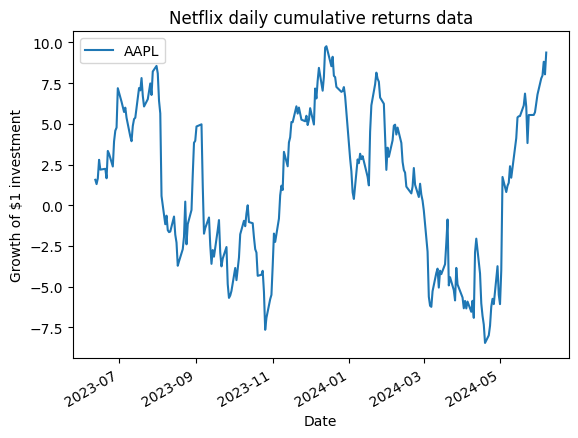

In [18]:
import matplotlib.pyplot as plt
import pandas_datareader as web
#fig = plt.figure()
#ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
return_df.plot()
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Netflix daily cumulative returns data")
plt.show()

In [106]:
#download_returns('AAPL', period='max', proxy=None)

cum_return = ((data.iloc[-1] - data.iloc[0]) / data.iloc[0])*100
cum_return

AAPL    7.623896
dtype: float64

In [19]:
data.iloc[-1]
data.tail()
import datetime
ticker = 'AAPL'
my_ticker = yf.Ticker(ticker)

start_date = datetime.datetime(2023, 5, 31)
end_date = datetime.datetime(2024, 5, 31)

prices_hist = my_ticker.history(start=start_date,end=end_date)
prices_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-31 00:00:00-04:00,176.393208,178.402541,175.826212,176.313629,99625300,0.0,0.0
2023-06-01 00:00:00-04:00,176.761252,179.168466,175.995316,179.138626,68901800,0.0,0.0
2023-06-02 00:00:00-04:00,180.073674,180.819712,178.313020,179.994095,61945900,0.0,0.0
2023-06-05 00:00:00-04:00,181.665223,183.972959,177.099459,178.631332,121946500,0.0,0.0
2023-06-06 00:00:00-04:00,179.019285,179.168487,176.492695,178.263306,64848400,0.0,0.0


In [20]:
pdr.get_data_yahoo(ticker, start, end).head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.004044,48870700
2023-06-12,181.270004,183.889999,180.970001,183.789993,182.819077,54274900
2023-06-13,182.800003,184.149994,182.440002,183.309998,182.341629,54929100
2023-06-14,183.369995,184.389999,182.020004,183.949997,182.978256,57462900
2023-06-15,183.960007,186.520004,183.779999,186.009995,185.027359,65433200


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

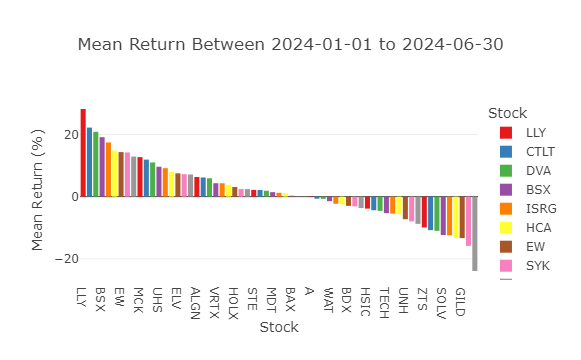

CPU times: total: 1.34 s
Wall time: 6.72 s


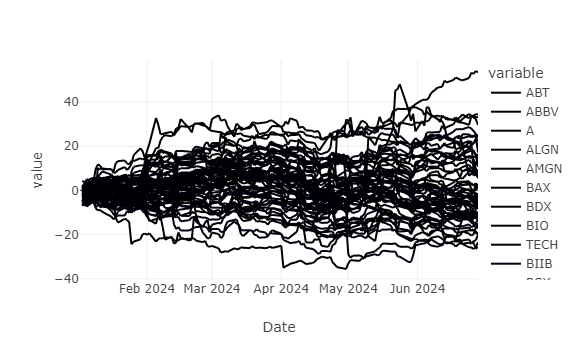

In [11]:
%%time

import streamlit as st
import plotly.graph_objects as go
import yfinance as yf
import datetime as dt
import pandas as pd
import plotly.express as px
pd.options.plotting.backend = "plotly"


# Create a dropdown menu to choose the graph type
#graph_type = st.selectbox('Select Graph Type 1', ['Bar Chart', 'Line Chart', 'Scatter Plot'])
stock_type_selected = st.selectbox('Select Stock Type 1', ['S & P 500 Stocks', 'Broad Market'])
stock_industry_selected = st.selectbox('Select Stock Industry 1', ['Industrials', 'Health_Care', 'Information_Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer_Discretionary',
       'Real_Estate', 'Communication_Services', 'Consumer_Staples',
       'Energy'])


look_back_years = 1

default_start_date = dt.datetime(dt.date.today().year - look_back_years, dt.date.today().month, dt.date.today().day)
default_end_date  = dt.datetime(dt.date.today().year, dt.date.today().month, dt.date.today().day)


start =   st.text_input("Enter start date", value="", max_chars= 10, placeholder= default_start_date, disabled=False, label_visibility="visible")
end =     st.text_input("Enter start date", value="", max_chars= 10, placeholder= default_end_date, disabled=False, label_visibility="visible")

start = '2024-01-01'
end  = '2024-06-30'

data = pd.DataFrame()
return_df  = pd.DataFrame()

def get_stock(stock_type,stock_industry):
    if stock_type == 'S & P 500 Stocks':
       #retrieve table of list of companies on  s & p 500
       url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
       df = pd.read_html(url)
       #sectors of economy
       Industrials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Industrials')]
       Financials = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Financials')]
       Information_Technology  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Information Technology')]
       Health_Care   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Health Care')]
       Consumer_Discretionary = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Discretionary')]
       Consumer_Staples  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Consumer Staples')]
       Utilities   = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Utilities')]
       Real_Estate  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Real Estate')]
       Materials  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Materials')]
       Communication_Services = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Communication Services')]
       Energy  = df[0]['Symbol'][df[0]['GICS Sector'].str.contains(pat='Energy')]


        
       if   stock_industry == 'Industrials':
            try:
               for ticker in Industrials:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   #df  = pdr.get_data_yahoo(ticker, start, end)['Adj Close'] 
                   #cumulative daily return
                   #rf  = df.pct_change().cumsum()
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100

            except:
                pass
        
       elif stock_industry == 'Health_Care':
            try:
               for ticker in Health_Care:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100

            except:
                pass
        
       elif stock_industry == 'Information_Technology':
            try:
               for ticker in Information_Technology:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100

            except:
                pass
        
       elif stock_industry == Utilities:
            try:
               for ticker in Utilities:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100

            except:
                pass
        
       elif stock_industry == 'Financials':
            try:
               for ticker in  Financials:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100

            except:
                pass
        
       elif stock_industry == 'Materials':
            try:
               for ticker in  Materials :
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100
            except:
                pass                      
        
       elif stock_industry == 'Consumer_Discretionary':
            try:
               for ticker in  Consumer_Discretionary:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100  
            except:
                pass                      

       elif stock_industry == 'Real_Estate':
            try:
               for ticker in  Real_Estate:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100 
            except:
                pass                      
        
        
       elif stock_industry == 'Communication_Services':
            try:
               for ticker in  Communication_Services:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100  
            except:
                pass                      

       elif stock_industry == 'Consumer_Staples':
            try:
               for ticker in  Consumer_Staples:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100  
            except:
                pass                      
        
        
       elif stock_industry == 'Energy':
            try:
               for ticker in  Energy:
                   df = yf.download(ticker, start=start, end=end)['Adj Close']
                   rf =  (df.pct_change() + 1).cumprod()-1
                   if len(df) > 0:
                      data[ticker] = df
                      return_df[ticker]  = rf*100                        

            except:
     
                pass   
           
    return return_df







# Create a function to generate the graph
def generate_graph(graph_type):
    if graph_type == 'Bar Chart':
        fig = go.Figure(data=[go.Bar(x=df['Category'], y=df['Value'])])
    elif graph_type == 'Line Chart':
        fig = go.Figure(data=[go.Line(x=df['Category'], y=df['Value'])])
    elif graph_type == 'Scatter Plot':
        fig = go.Figure(data=[go.Scatter(x=df['Category'], y=df['Value'])])
    return fig

# Create a Streamlit app
#st.title('Returns Chart')
#st.write('Select a graph type to display:')
#graph_type_selected = st.selectbox('Select Graph Type 2', ['Bar Chart', 'Line Chart', 'Scatter Plot'])
#fig = generate_graph(graph_type_selected)
#st.plotly_chart(fig, use_container_width=True)
return_df = get_stock('S & P 500 Stocks','Health_Care')
d = return_df.mean().reset_index().rename(columns= {'index':'Stock',0:'Mean_Return'}).sort_values(by='Mean_Return',ascending=False)
fig = px.bar(d, x="Stock", y="Mean_Return", orientation='v',title= f"Mean Return Between {start} to {end}", color="Stock",color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_layout(yaxis_title="Mean Return (%)")
# Format y-axis as percentage
#fig.update_yaxes(tickformat=".0%")
#st.plotly_chart(fig, use_container_width=True)
#st.dataframe(d)
fig.show()

return_df.plot()

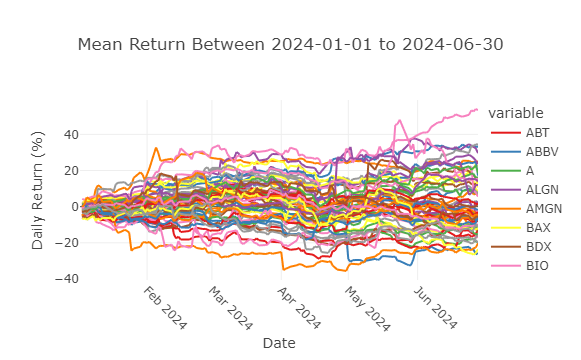

In [21]:
#fig = px.line(d, x="Stock", y="Mean_Return", orientation='v',title= f"Mean Return Between {start} to {end}", color="Stock",color_discrete_sequence=px.colors.qualitative.Set1)
fig=return_df.plot(color_discrete_sequence=px.colors.qualitative.Set1,title= f"Mean Return Between {start} to {end}")
fig.update_layout(yaxis_title="Daily Return (%)")
fig.update_xaxes(tickangle=45)
fig.show()